In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import warnings
from  sklearn import preprocessing
warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [32]:
data = pd.read_excel("D:\\KESHE\\keshe\\gprj\\mathmatical-2021\\第一问\\原始数据\\Molecular-200.xlsx")
# data = pd.read_excel("")

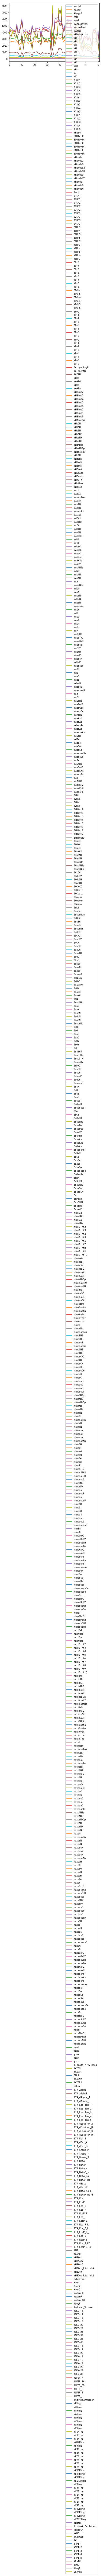

In [26]:
data.plot()
plt.show()

In [33]:
from sklearn.ensemble import IsolationForest
data = data.iloc[0:,1:]
data = preprocessing.scale(data)
data.plot()
# model = IsolationForest(n_estimators=10)
#
# model.fit(data)
# data.plot()
# plt.scatter(data)

plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

In [34]:
error_value_list = []
def three_sigma(ser1):
    # 求平均值
    mean_value = ser1.mean()
    # 求标准差
    std_value = ser1.std()
    # 位于(μ-3σ,μ+3σ)区间内的数据是正常的，不在该区间的数据是异常的
    # ser1中的数值小于μ-3σ或大于μ+3σ均为异常值
    # 一旦发现异常值就标注为True，否则标注为False
    rule = (mean_value - 3 * std_value > ser1) | (mean_value + 3 * std_value < ser1)
    #print(rule)
    if rule is True:
        # 返回异常值的位置索引
        index = np.arange(ser1.shape[0])[rule]
        error_value_list.append(index)
    return error_value_list

error_value_count = 0
data_313 = pd.read_excel("D:\KESHE\keshe\gprj\mathmatical-2021\第一问\原始数据\Molecular_Descriptor.xlsx")
for i in range(1, len(data_313.columns)):
    error_value_list = three_sigma(data_313[data_313.columns[i]])
    for j in range(len(error_value_list)):
        print(data_313[data_313.columns[i]].iloc[error_value_list[j]])
        error_value_count += 1
if error_value_count == 0:
    print("原始数据中不含异常值！")
else:
    print("原始数据中共含有" + str(error_value_count) + "个异常值！")

import tensorflow


313号样本原始数据中不含异常值！
